In [11]:
%pip install numpy pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
import pandas as pd


In [14]:
df = pd.read_csv('dataset/spam.csv',encoding='ISO-8859-1')

In [15]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

### 1 Data cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
#drop last 3 columns
df.drop(columns=df.columns[2:], inplace=True)

In [21]:
df.sample(5)

,v1,v2
2999,ham,Id onluy matters when getting on from offcampus
2502,ham,Ola would get back to you maybe not today but ...
1750,ham,Got it..mail panren paru..
1220,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
3412,ham,Where do you need to go to get it?


In [22]:
##renaming the cols
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [23]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/9f/c4/0ab22726a04ede56f689476b760f98f8f46607caecff993017ac1b64aa5d/scikit_learn-1.8.0-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_learn-1.8.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.10.0 from https://files.pythonhosted.org/packages/c2/7f/acbd28c97e990b421af7d6d6cd416358c9c293fc958b8529e0bd5d2a2a19/scipy-1.16.3-cp312-cp312-win_amd64.whl.metadata
  Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for joblib>=1.3.0 from https://files.pythonhosted.org/packages/7b/91/984aca2ec129e2757d1e4e3c81c3fcda9d0f85b74670a094cc443d9ee949/joblib-1.5.3-py3-none-any.whl.metadata
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for threadpoolctl>=3.2.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])


In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(403)

In [28]:
df.drop_duplicates(inplace=True)

### 2. EDA

target
0    4516
1     653
Name: count, dtype: int64

In [32]:
%pip install matplotlib seaborn 

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/30/4e/c10f171b6e2f44d9e3a2b96efa38b1677439d79c99357600a62cc1e9594e/matplotlib-3.10.8-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl.metadata (52 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/19/e8/6026ed58a64563186a9ee3f29f41261fd1828f527dd93d33b60feca63352/contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b4


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline



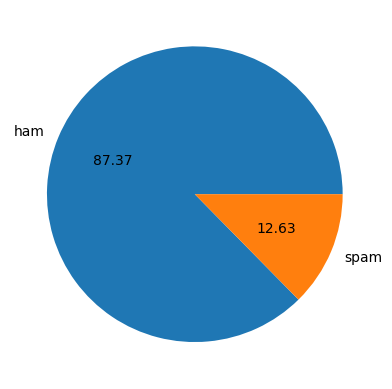

In [36]:
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()


In [ ]:
#data is imbalanced

In [37]:
%pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/60/90/81ac364ef94209c100e12579629dc92bf7a709a84af32f8c551b02c07e94/nltk-3.9.2-py3-none-any.whl.metadata
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/98/78/01c019cdb5d6498122777c1a43056ebb3ebfeef2076d9d026bfe15583b2b/click-8.3.1-py3-none-any.whl.metadata
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/1a/67/3b92df89f179d7c367be654ab5626ae311cb28f7d5c237b6bb976cd5fbbb/regex-2025.11.3-cp312-cp312-win_amd64.whl.metadata
  Using cached regex-2025.11.3-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqdm-4.67.1-py3-none-any.whl.metadata
  U


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pytho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pytho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [44]:
df['num_characters'] = df['text'].apply(len)

In [45]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [47]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [48]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [49]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [53]:
num_col = ['num_characters', 'num_words', 'num_sentences']
df[num_col].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
df[df['target'] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [55]:
df[df['target'] == 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [56]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

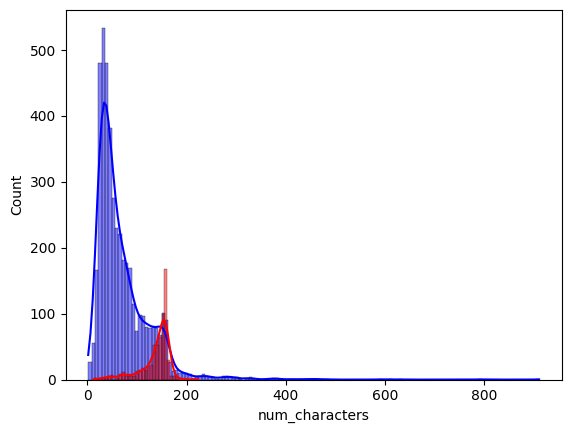

In [58]:
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

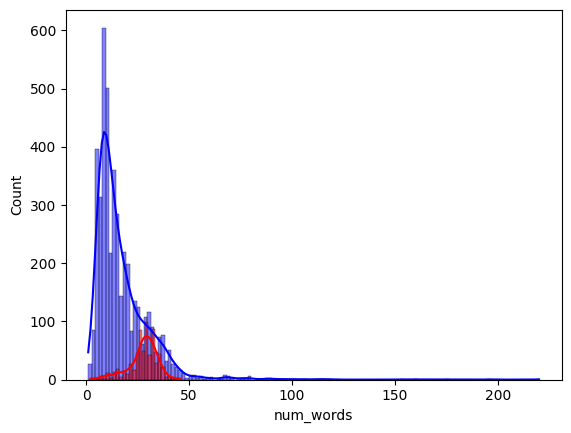

In [59]:
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_words'], color='red', kde=True)

<Axes: xlabel='num_sentences', ylabel='Count'>

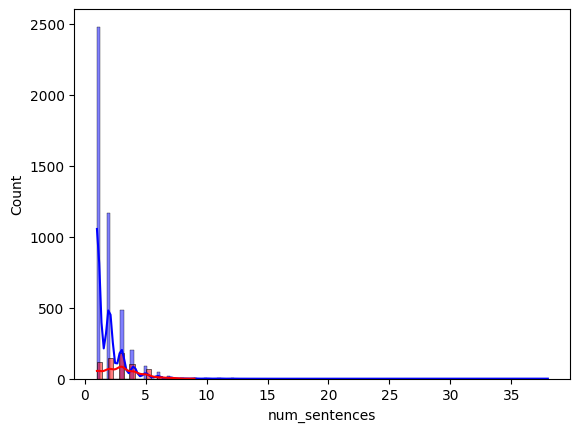

In [60]:
sns.histplot(df[df['target'] == 0]['num_sentences'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red', kde=True)

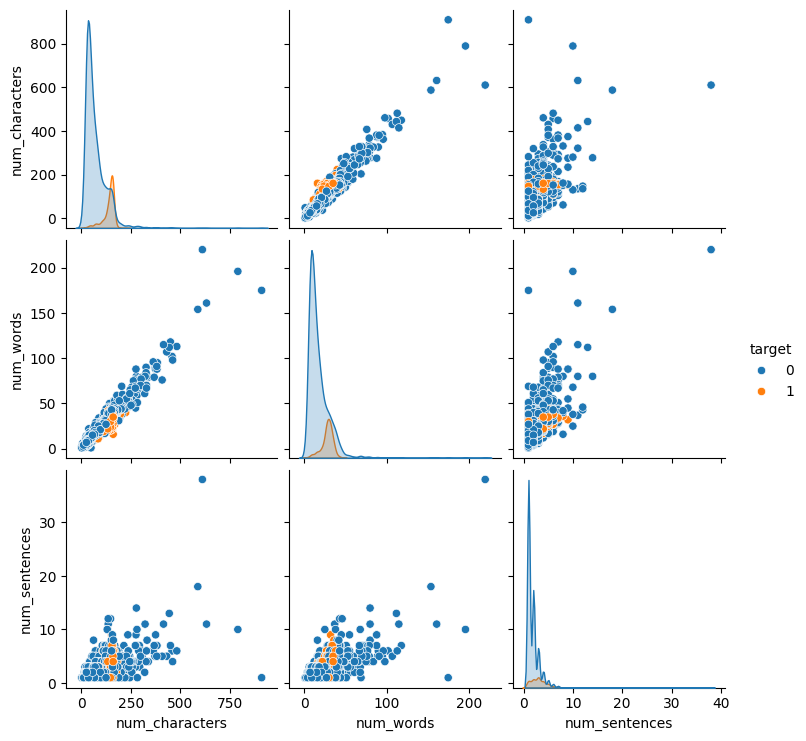

In [62]:
sns.pairplot(df,hue='target')

<Axes: >

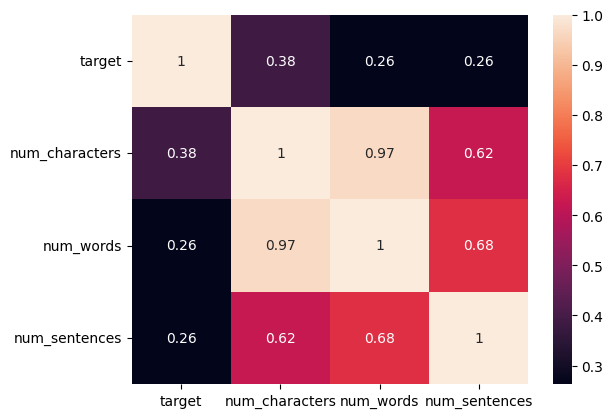

In [67]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
